In [ ]:
# Import the Pandas library for handling datasets (reading, writing, and manipulating data)
import pandas as pd

# Import Matplotlib's plotting module for creating visualizations
import matplotlib.pyplot as pt

# Import Seaborn for creating advanced, good-looking statistical plots
import seaborn as sns

# Import Scikit-learn (sklearn), a popular machine learning library
import sklearn

# This makes Matplotlib plots appear directly inside the notebook (Jupyter/Colab only)
%matplotlib inline



In [ ]:
file_Path = "heart_disease_uci.csv"   # File path of the dataset
HD_Dataset = pd.read_csv(file_Path)   # Load dataset into a pandas DataFrame
HD_Dataset.head()                     # Display first 5 rows of the dataset
HD_Dataset                            # Display the entire dataset



,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


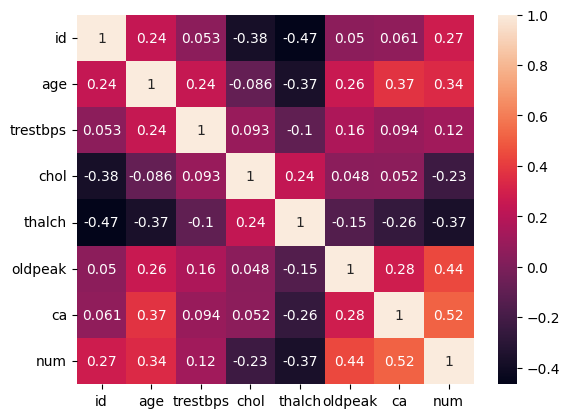

In [ ]:
pt.Figure(figsize=(16,16))                   # Create a figure with custom size
corr = HD_Dataset.corr(numeric_only=True)    # Calculate correlation matrix for numeric columns
sns.heatmap(data=corr, annot=True)           # Plot heatmap with correlation values shown
pt.show()                                    # Display the heatmap


In [4]:
HD_Dataset.shape

(920, 16)

In [5]:
HD_Dataset.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

<Axes: >

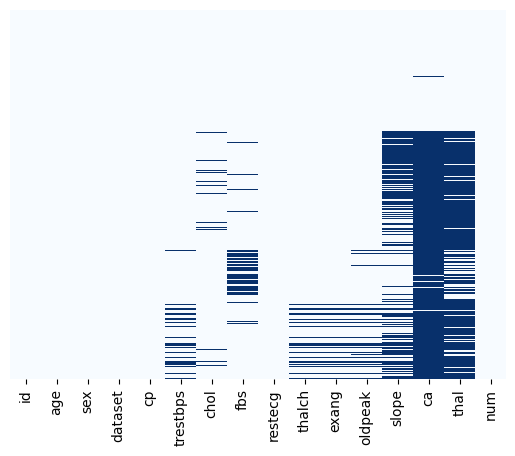

In [ ]:
# Visualize missing values in the dataset
sns.heatmap(HD_Dataset.isnull(), cmap="Blues", cbar=False, yticklabels=False)


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\2320517229.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=HD_Dataset, x="num", y="ca", palette="GnBu_d").set_title("Slope Vs Peak")


Text(0.5, 1.0, 'Slope Vs Peak')

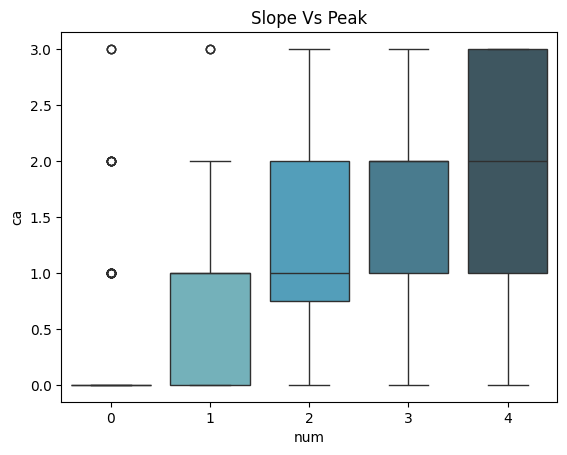

In [ ]:
# Create a boxplot of 'ca' values grouped by 'num' and set a title
sns.boxplot(data=HD_Dataset, x="num", y="ca", palette="GnBu_d").set_title("Slope Vs Peak")


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\651729800.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=HD_Dataset, x="thal", y="num", palette="GnBu_d").set_title("Slope Vs Peak")


Text(0.5, 1.0, 'Slope Vs Peak')

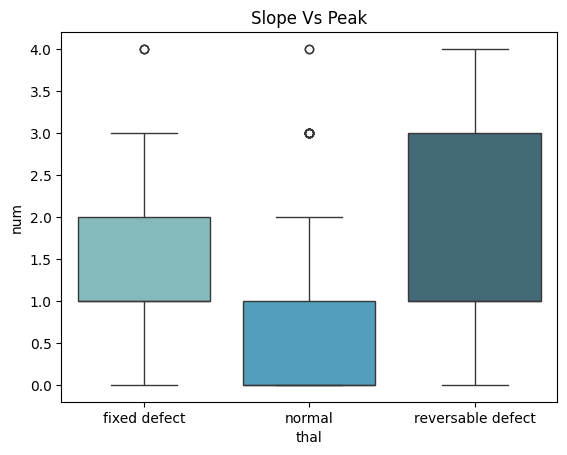

In [ ]:
# Create a boxplot of 'num' values grouped by 'thal' and set a title
sns.boxplot(data=HD_Dataset, x="thal", y="num", palette="GnBu_d").set_title("Slope Vs Peak")


In [ ]:
# Function to impute missing values in 'thal' column based on the 'num' column
def impute_thal(col):
    thal = col[0]             # First element is 'thal'
    num = col[1]              # Second element is 'num'
    if pd.isnull(thal):       # Check if 'thal' value is missing
        if num <= 1:          # If 'num' is 0 or 1, assign 'normal'
            return "normal"
        elif num >= 2:        # If 'num' is 2 or more, assign 'reversable defect'
            return "reversable defect"
        else:                 # Otherwise assign 'fixed defect'
            return "fixed defect"
    return thal               # If not missing, return original value

# Apply the function to fill missing values in 'thal' column
HD_Dataset["thal"] = HD_Dataset[["thal", "num"]].apply(impute_thal, axis=1)


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\17437164.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thal=col[0]
C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\17437164.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num=col[1]


In [ ]:
# Drop the 'id' column from the dataset as it is not useful for analysis
HD_Dataset.drop("id", inplace=True, axis=1)


In [11]:
HD_Dataset

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,normal,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,normal,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,normal,0


In [ ]:
# Calculate the mean value of the 'chol' column
mean_chol = HD_Dataset["chol"].mean()

# Fill missing values in 'chol' column with the calculated mean
HD_Dataset["chol"].fillna(mean_chol, inplace=True)


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\4142830234.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  HD_Dataset["chol"].fillna(mean_chol, inplace=True)


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\3763504664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=HD_Dataset, x="ca", y="num", palette="GnBu_d").set_title("Slope Vs Peak")


Text(0.5, 1.0, 'Slope Vs Peak')

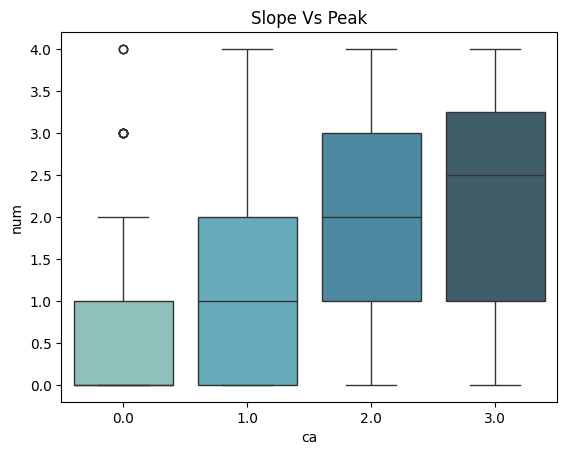

In [ ]:
# Create a boxplot of 'num' values grouped by 'ca' and set a title
sns.boxplot(data=HD_Dataset, x="ca", y="num", palette="GnBu_d").set_title("Slope Vs Peak")


In [ ]:
# Import random library (not used here but available if needed for random operations)
import random

# Function to impute missing values in 'ca' column based on the 'num' column
def impute_ca(col):
    ca = col[0]              # First element is 'ca'
    num = col[1]             # Second element is 'num'
    if pd.isnull(ca):        # Check if 'ca' value is missing
        if num <= 1:         # If 'num' is 0 or 1, assign 0
            return 0
        elif num > 1 and num <= 2:   # If 'num' is between 1 and 2, assign 1
            return 1
        elif num >= 2.6:     # If 'num' is 2.6 or more, assign 3
            return 3
        else:                # Otherwise assign 2
            return 2
    return ca                # If not missing, return original value

# Apply the function to fill missing values in 'ca' column
HD_Dataset["ca"] = HD_Dataset[["ca","num"]].apply(impute_ca, axis=1)


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\309356693.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ca=col[0]
C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\309356693.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num=col[1]


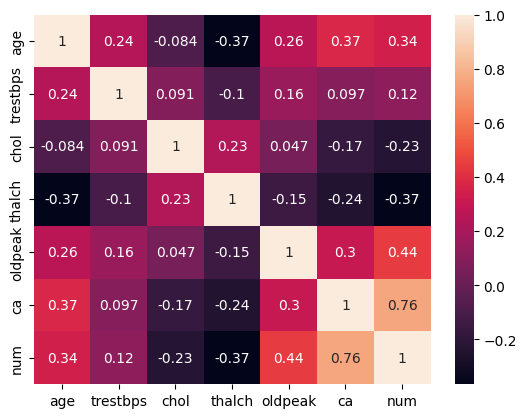

In [ ]:
# Create a figure with custom size
pt.Figure(figsize=(16,16))

# Calculate correlation matrix for numeric columns
corr = HD_Dataset.corr(numeric_only=True)

# Plot heatmap with correlation values displayed
sns.heatmap(data=corr, annot=True)

# Show the heatmap
pt.show()


In [ ]:
# Function to impute missing values in 'slope' column based on the 'oldpeak' column
def impute_slope(col):
    slope = col[0]                 # First element is 'slope'
    oldpeak = col[1]               # Second element is 'oldpeak'
    if pd.isnull(slope):           # Check if 'slope' value is missing
        if oldpeak <= 0.5:         # If 'oldpeak' is 0.5 or less, assign 'upslopping'
            return "upslopping"
        elif oldpeak > 0.5 and oldpeak <= 1.7:   # If 'oldpeak' is between 0.5 and 1.7, assign 'flat'
            return "flat"
        else:                      # If 'oldpeak' is greater than 1.7, assign 'downslopping'
            return "downslopping"
    return slope                   # If not missing, return original value

# Apply the function to fill missing values in 'slope' column
HD_Dataset["slope"] = HD_Dataset[["slope","oldpeak"]].apply(impute_slope, axis=1)


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\3390186978.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope=col[0]
C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\3390186978.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  oldpeak=col[1]


In [17]:
HD_Dataset["slope"].shape

(920,)

C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\598215048.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=HD_Dataset, x="fbs", y="age", palette="GnBu_d").set_title("Slope Vs Peak")


Text(0.5, 1.0, 'Slope Vs Peak')

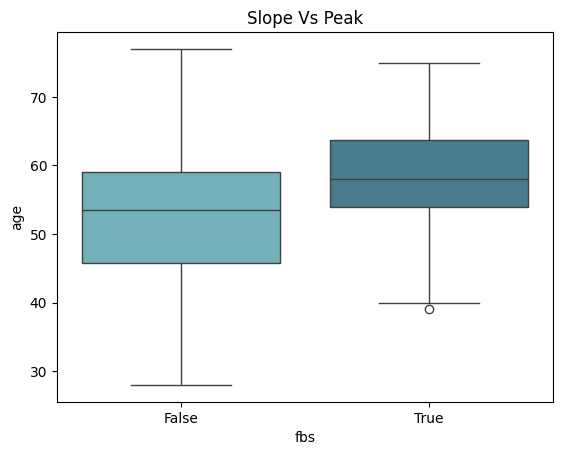

In [ ]:
# Create a boxplot of 'age' values grouped by 'fbs' and set a title
sns.boxplot(data=HD_Dataset, x="fbs", y="age", palette="GnBu_d").set_title("Slope Vs Peak")


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\3113306054.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=HD_Dataset, x="fbs", y="trestbps", palette="GnBu_d").set_title("Slope Vs Peak")


Text(0.5, 1.0, 'Slope Vs Peak')

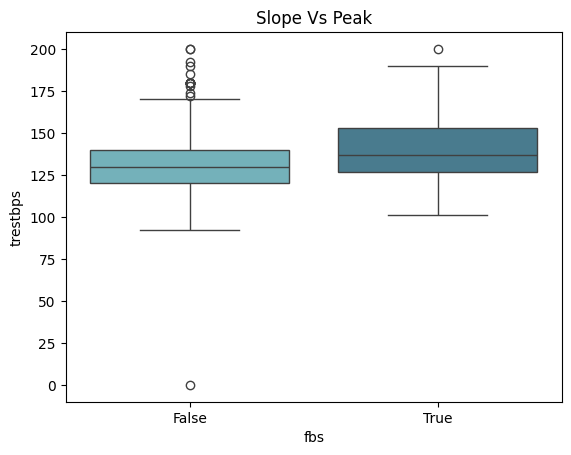

In [19]:
sns.boxplot(data=HD_Dataset, x="fbs", y="trestbps", palette="GnBu_d").set_title("Slope Vs Peak")


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\3356797423.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=HD_Dataset, x="fbs", y="chol", palette="GnBu_d").set_title("Slope Vs Peak")


Text(0.5, 1.0, 'Slope Vs Peak')

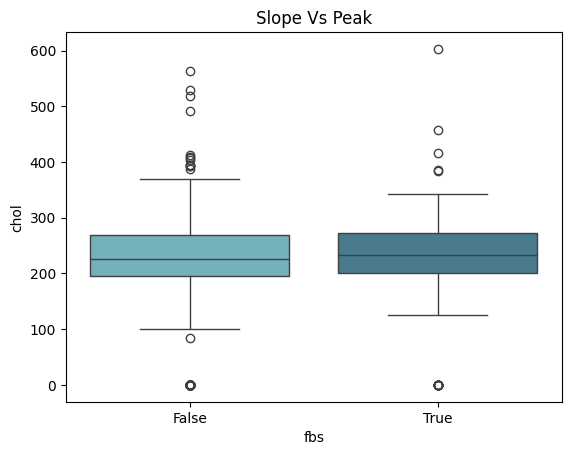

In [20]:
sns.boxplot(data=HD_Dataset, x="fbs", y="chol", palette="GnBu_d").set_title("Slope Vs Peak")


In [ ]:
# Function to impute missing values in 'fbs' column based on the 'age' column
def impute_fbs(col):
    fbs = col[0]             # First element is 'fbs'
    age = col[1]             # Second element is 'age'
    if pd.isnull(fbs):       # Check if 'fbs' value is missing
        if age <= 55:        # If 'age' is 55 or younger, assign False
            return False
        else:                # If 'age' is greater than 55, assign True
            return True
    return fbs               # If not missing, return original value

# Apply the function to fill missing values in 'fbs' column
HD_Dataset["fbs"] = HD_Dataset[["fbs","age"]].apply(impute_fbs, axis=1)


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\4294022814.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fbs=col[0]
C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\4294022814.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=col[1]


In [22]:
HD_Dataset["age"].shape

(920,)

<Axes: >

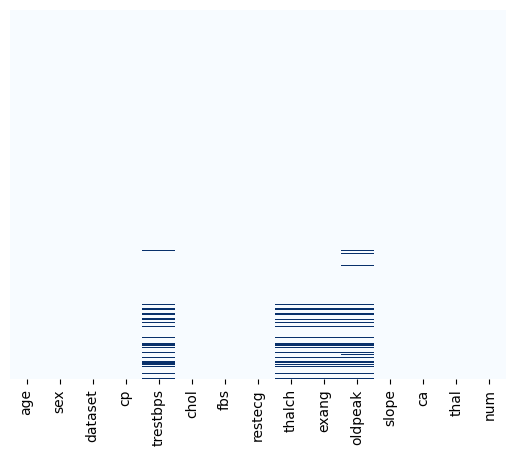

In [23]:
sns.heatmap(HD_Dataset.isnull(), cmap="Blues", cbar=False, yticklabels=False)

In [24]:
HD_Dataset.dropna()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,upslopping,0.0,normal,1
914,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,upslopping,1.0,normal,2
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,upslopping,0.0,normal,1
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,upslopping,1.0,fixed defect,2


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\2247776689.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=HD_Dataset, x="exang", y="oldpeak", palette="GnBu_d").set_title("Slope Vs Peak")


Text(0.5, 1.0, 'Slope Vs Peak')

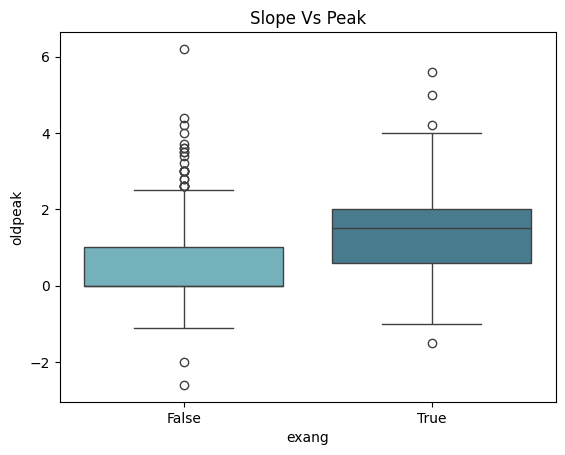

In [25]:
sns.boxplot(data=HD_Dataset, x="exang", y="oldpeak", palette="GnBu_d").set_title("Slope Vs Peak")


In [ ]:
# Function to impute missing values in 'exang' column based on the 'oldpeak' column
def impute_exang(col):
    exang = col[0]                  # First element is 'exang'
    oldpeak = col[1]                # Second element is 'oldpeak'
    if pd.isnull(exang):            # Check if 'exang' value is missing
        if oldpeak >= 0 and oldpeak <= 1:   # If 'oldpeak' is between 0 and 1, assign False
            return False
        else:                        # Otherwise assign True
            return True
    return exang                     # If not missing, return original value

# Apply the function to fill missing values in 'exang' column
HD_Dataset["exang"] = HD_Dataset[["exang","oldpeak"]].apply(impute_exang, axis=1)


C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\2005407550.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  exang=col[0]
C:\Users\Ahsan Computer\AppData\Local\Temp\ipykernel_16628\2005407550.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  oldpeak=col[1]


<Axes: >

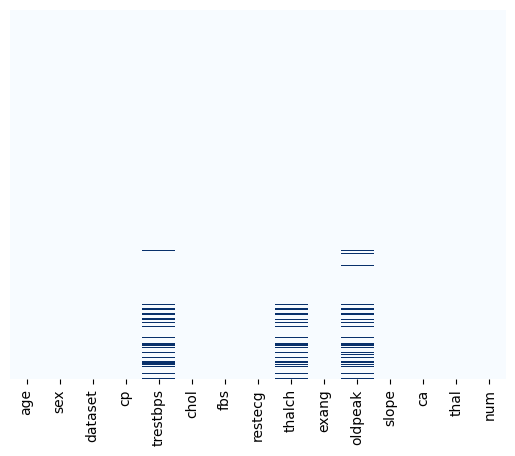

In [27]:
sns.heatmap(HD_Dataset.isnull(), cmap="Blues", cbar=False, yticklabels=False)

<Axes: >

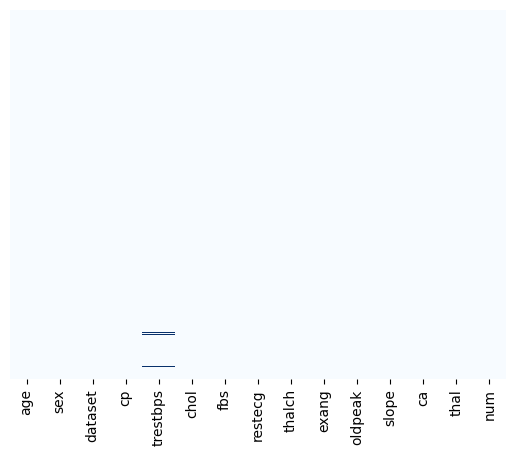

In [ ]:
# Drop rows where 'oldpeak' column has missing values
HD_Dataset = HD_Dataset.dropna(subset=['oldpeak'])

# Drop rows where 'restecg' column has missing values
HD_Dataset = HD_Dataset.dropna(subset=['restecg'])

# Drop rows where 'thalch' column has missing values
HD_Dataset = HD_Dataset.dropna(subset=['thalch'])

# Display the updated dataset
HD_Dataset

# Visualize missing values after dropping rows
sns.heatmap(HD_Dataset.isnull(), cmap="Blues", cbar=False, yticklabels=False)


In [ ]:
# Define a list of categorical columns
objcat = ["slope", "exang", "restecg", "fbs", "cp", "sex", "thal", "dataset"]

# Convert each column in the list to categorical data type
for col in objcat:
    HD_Dataset[col] = HD_Dataset[col].astype("category")


In [ ]:
# Display the names of all columns that have 'category' data type
HD_Dataset.select_dtypes(["category"]).columns


Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [ ]:
# Convert 'sex' categorical column into dummy/indicator variables
Sex = pd.get_dummies(HD_Dataset["sex"], drop_first=True)
Sex = Sex.astype("int")

# Convert 'exang' categorical column into dummy/indicator variables
Exang = pd.get_dummies(HD_Dataset["exang"], drop_first=True)
Exang = Exang.astype("int")

# Convert 'restecg' categorical column into dummy/indicator variables
Restecg = pd.get_dummies(HD_Dataset["restecg"], drop_first=True)
Restecg = Restecg.astype("int")

# Convert 'fbs' categorical column into dummy/indicator variables
Fbs = pd.get_dummies(HD_Dataset["fbs"], drop_first=True)
Fbs = Fbs.astype("int")

# Convert 'cp' categorical column into dummy/indicator variables
Cp = pd.get_dummies(HD_Dataset["cp"], drop_first=True)
Cp = Cp.astype("int")

# Convert 'slope' categorical column into dummy/indicator variables
Slope = pd.get_dummies(HD_Dataset["slope"], drop_first=True)
Slope = Slope.astype("int")

# Convert 'thal' categorical column into dummy/indicator variables
Thal = pd.get_dummies(HD_Dataset["thal"], drop_first=True)
Thal = Thal.astype("int")

# Convert 'dataset' categorical column into dummy/indicator variables
Dataset = pd.get_dummies(HD_Dataset["dataset"], drop_first=True)
Dataset = Dataset.astype("int")


In [ ]:
# Concatenate the original dataset with the newly created dummy variables
HD_Dataset = pd.concat([HD_Dataset, Sex, Exang, Restecg, Fbs, Cp, Slope, Thal, Dataset], axis=1)

# Print the shape of the updated dataset (rows, columns)
print(HD_Dataset.shape)


(855, 32)


In [33]:
HD_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855 entries, 0 to 919
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                855 non-null    int64   
 1   sex                855 non-null    category
 2   dataset            855 non-null    category
 3   cp                 855 non-null    category
 4   trestbps           852 non-null    float64 
 5   chol               855 non-null    float64 
 6   fbs                855 non-null    category
 7   restecg            855 non-null    category
 8   thalch             855 non-null    float64 
 9   exang              855 non-null    category
 10  oldpeak            855 non-null    float64 
 11  slope              855 non-null    category
 12  ca                 855 non-null    float64 
 13  thal               855 non-null    category
 14  num                855 non-null    int64   
 15  Male               855 non-null    int64   
 16  True         

In [ ]:
# Get the index (column position) of the column named "atypical angina"
HD_Dataset.columns.get_loc("atypical angina")


20

In [ ]:
# Rename the column at index 16 to "Exang"
HD_Dataset.columns.values[16] = "Exang"


In [36]:
HD_Dataset.columns.values[15]="Sex"


In [37]:
HD_Dataset.columns.values[19]="Fbs"


In [38]:
HD_Dataset

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,...,typical angina,downslopping,flat,upsloping,upslopping,normal,reversable defect,Hungary,Switzerland,VA Long Beach
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,...,1,0,0,0,0,0,0,0,0,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,...,0,0,1,0,0,1,0,0,0,0
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,...,0,0,1,0,0,0,1,0,0,0
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,...,0,0,0,0,0,1,0,0,0,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,...,0,0,0,0,1,1,0,0,0,1
914,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,...,0,0,0,0,1,1,0,0,0,1
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,...,0,0,0,0,1,1,0,0,0,1
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,...,0,0,0,0,1,0,0,0,0,1


In [39]:
HD_Dataset.drop(["exang","thal"], inplace=True, axis=1)

In [40]:
HD_Dataset

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,...,typical angina,downslopping,flat,upsloping,upslopping,normal,reversable defect,Hungary,Switzerland,VA Long Beach
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,2.3,...,1,0,0,0,0,0,0,0,0,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,1.5,...,0,0,1,0,0,1,0,0,0,0
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,2.6,...,0,0,1,0,0,0,1,0,0,0
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,3.5,...,0,0,0,0,0,1,0,0,0,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,1.4,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,0.0,...,0,0,0,0,1,1,0,0,0,1
914,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,0.0,...,0,0,0,0,1,1,0,0,0,1
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,0.0,...,0,0,0,0,1,1,0,0,0,1
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [41]:
HD_Dataset.drop(["sex", "cp", "fbs"], inplace=True, axis=1)

In [42]:
HD_Dataset.drop(["restecg", "slope"], inplace=True, axis=1)
HD_Dataset.drop(["dataset"], inplace=True, axis=1)



In [43]:
HD_Dataset
HD_Dataset.drop(['chol','trestbps'], axis=1, inplace=True)


In [ ]:
# Import function to split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Define features (x) by dropping the target column 'num'
x = HD_Dataset.drop(["num"], axis=1)

# Define target (y) as the 'num' column
y = HD_Dataset["num"]

# Split the dataset into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
# Import Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model instance
lreg = LogisticRegression()

# Train (fit) the model on the training data
lreg.fit(x_train, y_train)


c:\Users\Ahsan Computer\miniconda3\envs\first_env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# Use the trained Logistic Regression model to make predictions on the test set
predictions = lreg.predict(x_test)

# Print the predicted values
print(predictions)


[0 0 3 0 2 3 3 0 0 1 2 3 1 1 2 3 0 0 1 2 0 1 2 0 3 0 2 0 3 2 0 1 0 3 2 0 0
 0 2 1 1 0 0 1 0 0 1 1 0 3 0 0 0 0 2 0 1 0 1 0 3 3 0 1 0 0 0 1 2 0 2 0 0 0
 0 0 0 1 0 1 1 1 0 3 0 0 1 0 1 1 1 0 0 1 1 1 0 3 0 0 0 1 0 3 0 3 0 1 2 0 3
 1 0 0 1 1 0 0 1 2 0 0 1 1 0 1 1 1 0 0 0 3 2 0 1 1 3 0 0 0 0 0 0 3 0 0 0 2
 2 0 0 0 0 2 0 0 2 0 0 1 0 1 0 0 0 1 1 1 3 0 1]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print("Classification Report")
print("--"*30)
accuracy=round(accuracy_score(y_test, predictions)*100,2)
print(accuracy)

Classification Report
------------------------------------------------------------
72.51


In [ ]:
# Import metrics to evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score

# Print a header for the classification report
print("Classification Report")
print("--"*30)

# Calculate and print the accuracy score (rounded to 2 decimal places)
accuracy = round(accuracy_score(y_test, predictions) * 100, 2)
print(accuracy)


[[70  8  0  0  0]
 [15 30  4  1  0]
 [ 1  6 13  5  0]
 [ 1  1  1 11  0]
 [ 0  0  1  3  0]]


<Axes: >

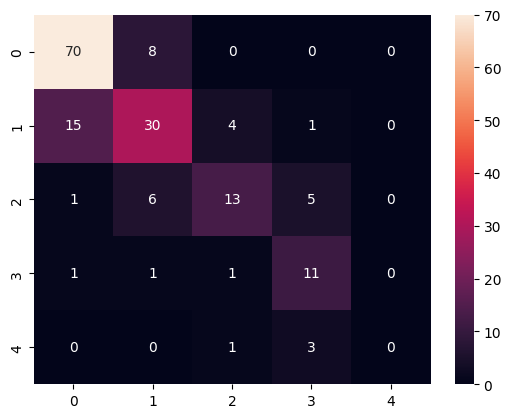

In [52]:
sns.heatmap(data=confusion, annot=True, fmt="d")

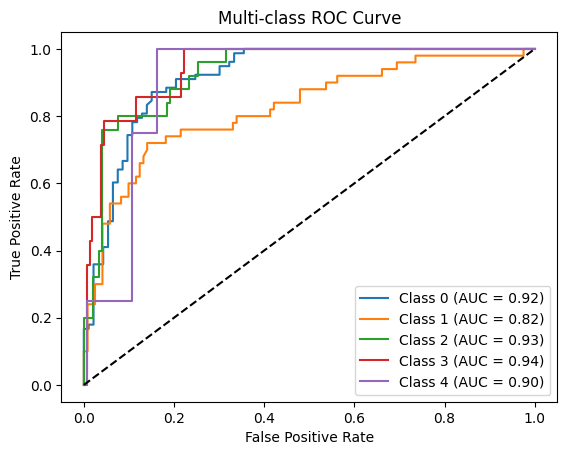

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Suppose you have 5 classes (0 to 4)
n_classes = 5

# Convert labels to binary (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4])
y_prob = lreg.predict_proba(x_test)  # get probabilities for all classes

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Add reference line
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend()
plt.show()
